# Lab 4

<p>Kiew Ten Wei<br>
U2221627A</p>

In [42]:
import numpy as np
import pandas as pd
import math
import whois
from ipwhois import IPWhois
from ipwhois.exceptions import IPDefinedError
import networkx as nx
import matplotlib.pyplot as plt
from igraph import Graph, plot
import cairo
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from scapy.all import *
from mpl_interactions import ioff, panhandler, zoom_factory

In [43]:
SFlow_att_cat = ['Type', 'flow_agent_address', 'inputPort', 'outputPort', 'scr_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling_rate', 'NA']
data = pd.read_csv('Data_3.csv', names=SFlow_att_cat)
data = data.drop(data.columns[-1], axis=1)
data.head(10)

,Type,flow_agent_address,inputPort,outputPort,scr_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
5,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.255.221.151,17,0x00,120,55069,26509,0x10,113,91,2048
6,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.250.8,193.62.193.9,6,0x00,62,27419,80,0x10,58,40,2048
7,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,193.61.196.206,140.110.147.170,6,0x00,240,443,43545,0x18,1518,1500,2048
8,FLOW,203.30.38.251,200,3,80711fc76001,00235ed9b680,0x0800,280,32,137.189.133.62,123.136.64.7,6,0x00,58,6345,34921,0x10,1342,1320,2048
9,FLOW,203.30.38.251,199,130,544b8cf9a7df,00239cd087c1,0x0800,600,919,193.62.192.8,137.132.228.15,6,0x08,55,34262,53923,0x10,1442,1420,2048


In [44]:
def get_organization(ip_add):
    ip = IPWhois(ip_add)
    result = ip.lookup_rdap()
    return result.get('network', {}).get('name')

# Top 5 Talker

In [45]:
top_five_talk = {}
for talker in data['src_IP']:
    if talker not in top_five_talk:
        top_five_talk[talker] = 1
    else :
        top_five_talk[talker] = top_five_talk[talker] + 1

talkerData = pd.DataFrame(top_five_talk.items(), columns=['src_IP', 'count'])
talkerData = talkerData.sort_values(by='count', ascending=False)

print("\tSource IP\t\tCount\t\tWhois:")
for num in range(1,6):
    organization = get_organization(talkerData.iloc[num-1]['src_IP'])
    print(str(num) + '\t' + talkerData.iloc[num-1]['src_IP'] + "\t\t" + str(talkerData.iloc[num-1]['count']) + "\t\t" + organization)


	Source IP		Count		Whois:
1	193.62.192.8		3041		EUR-BIO-INST
2	155.69.160.32		2975		NTUNET1
3	130.14.250.11		2604		NLM-ETHER
4	14.139.196.58		2452		NKN-IIT-GUW
5	140.112.8.139		2056		T-NTU.EDU.TW-NET


### Top 5 Listeners

In [46]:
top_five_list = {}

for listener in data['dst_IP']:
    if listener not in top_five_list:
        top_five_list[listener] = 1
    else :
        top_five_list[listener] = top_five_list[listener] + 1

listData = pd.DataFrame(top_five_list.items(), columns=['dst_IP', 'count'])
listData = listData.sort_values(by='count', ascending=False)

print("\tDestination IP\t\tCount\t\tWho Is")
for num in range(1,6):
    organization = get_organization(listData.iloc[num-1]['dst_IP'])
    print(str(num) + '\t' + listData.iloc[num-1]['dst_IP'] + "\t\t" + str(listData.iloc[num-1]['count'])+ "\t\t" + organization)

	Destination IP		Count		Who Is
1	103.37.198.100		3841		A-STAR-AS-AP
2	137.132.228.15		3715		NUSNET
3	202.21.159.244		2446		RPNET
4	192.101.107.153		2368		PNNL
5	103.21.126.2		2056		IITB-IN


### Top 5 Application

In [47]:
app_count = {}

for app in data['udp_dst_port/tcp_dst_port/icmp_code']:
    if app not in app_count:
        app_count[app] = 1
    else :
        app_count[app] = app_count[app] + 1

app_data = pd.DataFrame(app_count.items(), columns=['udp_dst_port/tcp_dst_port/icmp_code', 'count'])
app_data = app_data.sort_values(by='count', ascending=False)

print("\tapp\t\tCount")
for num in range(1,6):
    print(str(num) + '\t' + str(app_data.iloc[num-1]['udp_dst_port/tcp_dst_port/icmp_code']) + "\t\t" + str(app_data.iloc[num-1]['count']))

	app		Count
1	443		13423
2	80		2647
3	52866		2068
4	45512		1356
5	56152		1341


### Total Traffic

In [48]:
total_traffic = 0
for packetSize in data['IP_size']:
    total_traffic += packetSize
total_traffic=total_traffic*2048/ (2**20)
print("Total traffic (MB): " + str(total_traffic))


Total traffic (MB): 126519.18359375


### Proportion of TCP and UDP packet

In [49]:
no_of_proc = data['IP_protocol'].value_counts()
tcp_count = no_of_proc[6]
udp_count = no_of_proc[17]

tcp_percentage = tcp_count / len(data.index) * 100
udp_percentage = udp_count / len(data.index) * 100

print(f"TCP packet percentage: {tcp_count}, ({tcp_percentage}%)")
print(f"UDP packet percentage: {udp_count},({udp_percentage}%)")

TCP packet percentage: 56064, (80.81879775118928%)
UDP packet percentage: 9462,(13.639901974917112%)


### Top 5 communication pair

In [50]:
# Top 5 unique communication pairs
pairs = data.groupby(['src_IP', 'dst_IP']).size().sort_values(ascending = False).to_frame()
pairs.columns = ['No. of Packets']
pairs = pairs.reset_index()
print(pairs['src_IP'])
top_comm_df = pairs[:5]
top_comm_df

0                                  193.62.192.8
1                                 130.14.250.11
2                                 14.139.196.58
3                                 140.112.8.139
4                                137.132.228.15
                         ...                   
6584                              155.69.193.14
6585                             155.69.193.139
6586                             155.69.193.115
6587                             155.69.193.112
6588    fe80:0000:0000:0000:b2a8:6e03:ca76:6716
Name: src_IP, Length: 6589, dtype: object


,src_IP,dst_IP,No. of Packets
0,193.62.192.8,137.132.228.15,3041
1,130.14.250.11,103.37.198.100,2599
2,14.139.196.58,192.101.107.153,2368
3,140.112.8.139,103.21.126.2,2056
4,137.132.228.15,193.62.192.8,1910


In [51]:
print("\tSrc IP\t\tSrc Org\t\tDest IP\t\tDest Org")

for i in range(1,6):
    organisation = get_organization(top_comm_df.iloc[i - 1]['src_IP'])
    organisation2 = get_organization(top_comm_df.iloc[i - 1]['dst_IP'])
    print(str(i) + '\t' + top_comm_df.iloc[i - 1]['src_IP'] + "\t\t"+ organisation +"\t\t" + top_comm_df.iloc[i - 1]['dst_IP'] + "\t\t"+organisation2 )

	Src IP		Src Org		Dest IP		Dest Org
1	193.62.192.8		EUR-BIO-INST		137.132.228.15		NUSNET
2	130.14.250.11		NLM-ETHER		103.37.198.100		A-STAR-AS-AP
3	14.139.196.58		NKN-IIT-GUW		192.101.107.153		PNNL
4	140.112.8.139		T-NTU.EDU.TW-NET		103.21.126.2		IITB-IN
5	137.132.228.15		NUSNET		193.62.192.8		EUR-BIO-INST


### Visualising the communication between different IP hosts

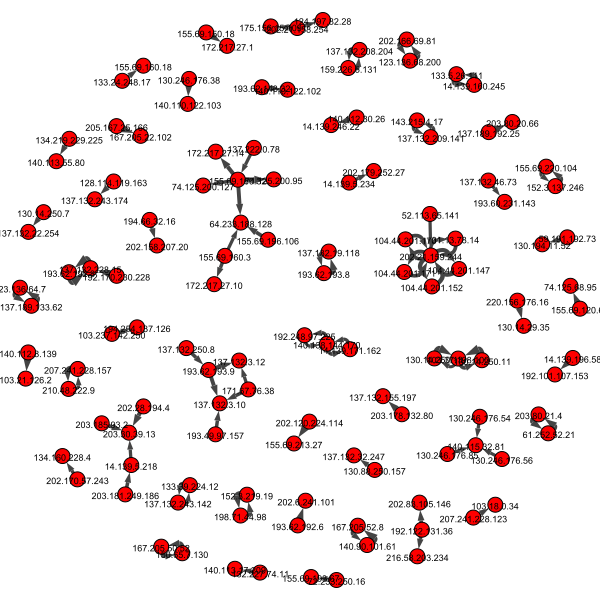

In [52]:
graph_series = data.groupby(["src_IP", "dst_IP"])\
             .size()\
             .nlargest(100)   
                       
graph_df = graph_series.to_frame().reset_index()
tuple_list = [tuple(edge) for edge in graph_df.head(n=100).to_numpy()]

g = Graph.TupleList(tuple_list, directed=True, weights=True)

g.vs["size"] = 15
g.vs["label_size"] = 9
g.vs["label"] = g.vs["name"]

g.es["width"] =  [max(math.log(weight)/1.5, 0) for weight in g.es['weight']]
g.es["arrow_size"] = [width / 5 for width in g.es["width"]]

plot(g, "network_graph.svg", bbox=(600,600))